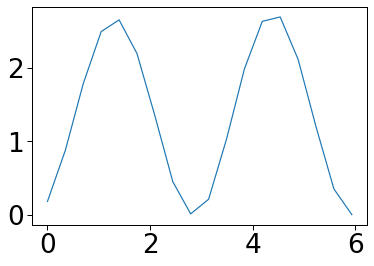

In [2]:
import numpy as np
import matplotlib.pyplot as plt
intensities = np.loadtxt('./intensities_angle.txt', delimiter=",")
angle = np.linspace(0, 340, 18)*np.pi/(180)
plt.plot(angle, intensities)
plt.show()

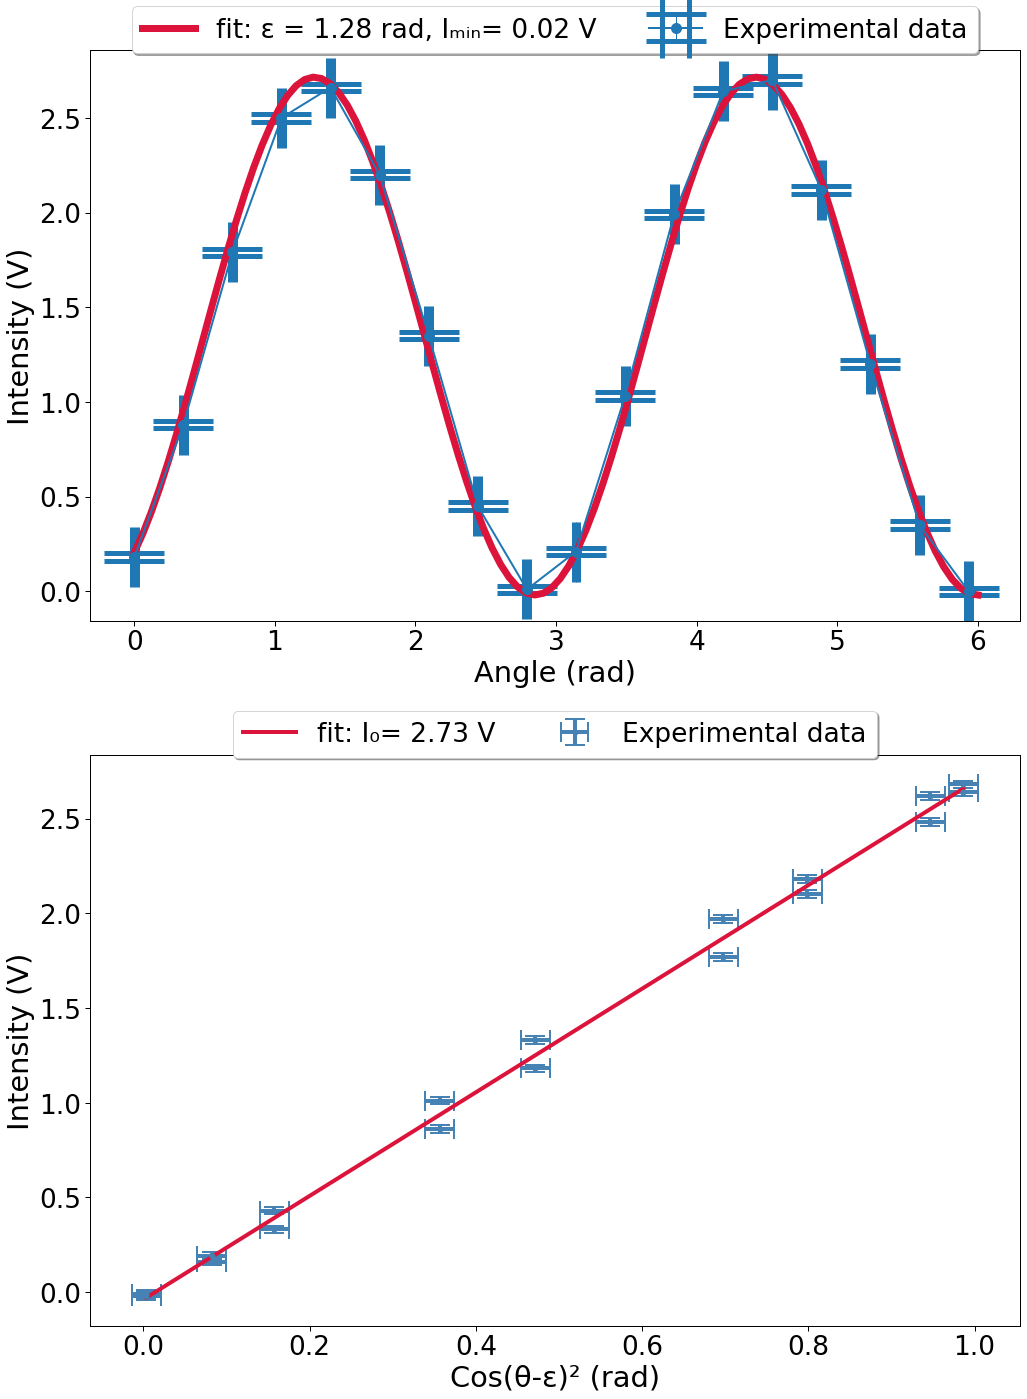

In [3]:
import seaborn as sns
from lmfit import Model

sns.set_context('paper', font_scale=3)

fig, ax = plt.subplots(2, 1, figsize=(15, 20))
from scipy.optimize import curve_fit
def fit_func(x, epsilon, I0, Imin):
    return I0*np.cos(x-epsilon)**2-Imin
p, cov = curve_fit(fit_func, angle, intensities, p0=[1, 1, -0.02], maxfev=100000)
ax[0].errorbar(angle, intensities, xerr=np.pi/180, yerr=0.02,fmt='-o',
                 capsize=30, elinewidth=1, capthick=5, lw=2,
                 markersize=10, label="Experimental data")
ax[0].plot(np.linspace(0,6,100), fit_func(np.linspace(0,6,100), *p),color='crimson',
             label='fit: ε =%5.2f rad, Iₘᵢₙ=%5.2f V' % (p[0], p[2]), lw=7)
ax[0].set_ylabel("Intensity (V)")
ax[0].set_xlabel("Angle (rad)")
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
def lin_func(x, a, b):
    return a*x+b
p, cov = curve_fit(fit_func, angle, intensities, p0=[1, 1, 0.1], maxfev=100000)
sort_indexes = np.argsort(np.cos(angle-p[0])**2)[::-1]
ax[1].errorbar((np.cos(angle-p[0])**2)[sort_indexes],(intensities-p[2])[sort_indexes], yerr=0.02,  xerr=np.sin(np.pi/180),linestyle = 'None', fmt='-o',
            capsize=10, elinewidth=4, capthick=2, markersize=5, color='steelblue', label="Experimental data")
p2, cov2 = curve_fit(lin_func, (np.cos(angle-p[0])**2)[sort_indexes], (intensities-p[2])[sort_indexes], p0=[1, 0], maxfev=100000)
ax[1].plot((np.cos(angle-p[0])**2)[sort_indexes], lin_func(np.cos(angle-p[0])**2, *p2)[sort_indexes],color='crimson',
             label='fit: I₀=%5.2f V' % (p2[0]), lw=4)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),

          ncol=3, fancybox=True, shadow=True)
ax[1].set_ylabel("Intensity (V)")
ax[1].set_xlabel("Cos(θ-ε)² (rad)")
plt.tight_layout()
plt.show()

In [27]:
len(intensities)

18

In [26]:
result

(array([ 1.28024399,  2.73441605, -0.01943025]),
 array([[ 6.22062810e-05,  2.43218828e-12,  4.22590780e-13],
        [ 2.43218828e-12,  1.86047325e-03, -9.30236632e-04],
        [ 4.22590780e-13, -9.30236632e-04,  6.97677465e-04]]),
 {'fvec': array([ 0.02498771,  0.07477835,  0.09845779,  0.06914704,  0.01834404,
         -0.0350457 , -0.08080142, -0.03978905, -0.02007875, -0.00501229,
         -0.07522165, -0.10154221, -0.07085296, -0.02165596,  0.0449543 ,
          0.06919858,  0.06021095, -0.01007875]),
  'nfev': 25,
  'fjac': array([[ 8.20324817e+00,  3.19265543e-01,  3.06160658e-01,
           1.49799798e-01, -7.66540522e-02, -2.67240619e-01,
          -3.32782333e-01, -2.42611491e-01, -3.89200375e-02,
           1.82982534e-01,  3.19265545e-01,  3.06160658e-01,
           1.49799801e-01, -7.66540522e-02, -2.67240616e-01,
          -3.32782331e-01, -2.42611490e-01, -3.89200375e-02],
         [-5.78026680e-08, -4.24264073e+00,  1.74701562e-01,
           2.05855539e-01,  2.509751

In [11]:
len(intensities.tolist())

18

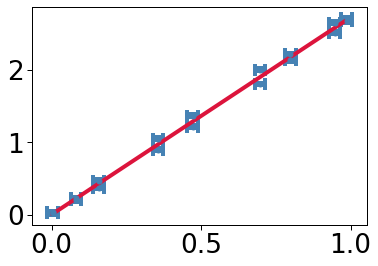

In [23]:
def lin_func(x, a, b):
    return a*x+b
p, cov = curve_fit(fit_func, angle, intensities, p0=[1, 1, 0.1], maxfev=100000)
sort_indexes = np.argsort(np.cos(angle-p[0])**2)[::-1]
plt.errorbar((np.cos(angle-p[0])**2)[sort_indexes],(intensities-p[2])[sort_indexes], yerr=0.02,  xerr=np.sin(np.pi/180),linestyle = 'None', fmt='-o',
            capsize=6, elinewidth=4, capthick=4, markersize=5, color='steelblue', label="Experimental data")

p2, cov2 = curve_fit(lin_func, (np.cos(angle-p[0])**2)[sort_indexes], (intensities-p[2])[sort_indexes], p0=[1, 0], maxfev=100000)
plt.plot((np.cos(angle-p[0])**2)[sort_indexes], lin_func(np.cos(angle-p[0])**2, *p2)[sort_indexes],color='crimson',
             label='fit: I0=%5.2f V' % (p2[0]), lw=4)


In [8]:
data

array([[0.08207162, 0.35627665, 0.69773143, 0.94666548, 0.98659978,
        0.79884864, 0.4712629 , 0.15712356, 0.00341993, 0.08207162,
        0.35627665, 0.69773143, 0.94666548, 0.98659978, 0.79884864,
        0.4712629 , 0.15712356, 0.00341993],
       [0.19943025, 0.89943025, 1.80943025, 2.51943025, 2.67943025,
        2.21943025, 1.36943025, 0.46943025, 0.02943025, 0.22943025,
        1.04943025, 2.00943025, 2.65943025, 2.71943025, 2.13943025,
        1.21943025, 0.36943025, 0.01943025]])

In [19]:
np.sqrt(cov[0,0])

0.007887095857536911

In [17]:
print(p)

[ 1.28024399  2.73441606 -0.01943025]
